In [17]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False)

# Thêm lớp Global Max Pooling
x = base_model.output
x = GlobalMaxPooling2D()(x)

# Tạo mô hình mới
model = Model(inputs=base_model.input, outputs=x)

In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array, verbose=0)
    return features


In [19]:
import matplotlib.pyplot as plt
import numpy as np

def showFeature(features):
  image = features.reshape(16, 32)
  print(image.shape)
  print(image)
  
  plt.subplot(1, 1, 1)  # Tạo subplot
  plt.imshow(image, cmap='viridis')  # Sử dụng viridis làm bảng màu
  plt.title(f'Feature map')
  plt.axis('off')  # Ẩn trục tọa độ

  plt.show()

In [20]:
import os

input_dir = 'VisualPhish/phishing/'
output_dir = 'VisualPhish/phishing_features/'

phishing_quantity = []

for subdir, dirs, files in os.walk(input_dir):
    phishing_quantity.append(len(files))
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(subdir, file)
            feature_path = img_path.replace(input_dir, output_dir) + '.npy'
            if os.path.exists(feature_path):
                continue
            features = extract_features(img_path, model)
            os.makedirs(os.path.dirname(feature_path), exist_ok=True)
            
            np.save(feature_path, features)
            #showFeature(features)
        else:
            print(file)


targets2.txt


In [21]:

input_dir = 'VisualPhish/trusted_list/'
output_dir = 'VisualPhish/trusted_list_features/'

legitimate_quantity = []

for subdir, dirs, files in os.walk(input_dir):
    legitimate_quantity.append(len(files))
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.pnp')):
            img_path = os.path.join(subdir, file)
            feature_path = img_path.replace(input_dir, output_dir) + '.npy'
            if os.path.exists(feature_path):
                continue
            features = extract_features(img_path, model)
            os.makedirs(os.path.dirname(feature_path), exist_ok=True)
            np.save(feature_path, features)
        else:
            print(file)

targets.txt


In [22]:
def drawG(sample_array, title):
  # Vẽ biểu đồ cột
  plt.bar(range(len(sample_array)), sample_array)

  # Đặt tiêu đề và nhãn cho trục
  plt.title(title)
  plt.xlabel("Sites")
  plt.ylabel("Num of page")

  # Hiển thị biểu đồ
  plt.show()


[1, 8, 7, 1, 1, 69, 1, 40, 20, 116, 7, 10, 1, 1, 2, 1, 1, 1, 1, 1, 1, 6, 1, 2, 1, 3, 1, 1, 3, 1, 20, 4, 1, 5, 43, 3, 4, 1, 1, 1, 1, 34, 2, 5, 1, 1, 1, 2, 2, 2, 1, 1, 6, 1, 33, 9, 2, 6, 1, 5, 1, 3, 1, 1, 2, 3, 34, 2, 1, 35, 3, 1, 6, 2, 43, 1, 1, 34, 32, 15, 11, 1, 39, 1, 1, 1, 1, 2, 4, 13, 9, 3, 16, 1, 1, 1, 1, 26, 1, 1, 2, 1, 51, 1, 2, 1, 1, 2, 120, 1, 1, 3, 3, 1, 1, 2, 3, 1, 4, 2, 1, 2, 1, 1, 8, 1, 3, 1, 1, 1, 3, 1, 2, 4, 1, 1, 4, 1, 1, 1, 2, 2, 1, 1, 9, 1, 1, 1, 37, 26, 2, 1, 3, 1, 1]
[54, 45, 44, 10, 66, 66, 49, 54, 38, 99, 56, 45, 8, 42, 45, 61, 38, 54, 42, 44, 66, 47, 5, 43, 44, 53, 30, 60, 26, 12, 25, 195, 43, 15, 158, 69, 65, 37, 53, 194, 27, 52, 54, 84, 23, 41, 10, 216, 45, 33, 34, 42, 66, 64, 14, 27, 48, 58, 77, 106, 70, 52, 96, 70, 120, 68, 78, 143, 37, 71, 49, 33, 41, 60, 89, 38, 48, 103, 36, 86, 114, 123, 99, 67, 23, 73, 90, 35, 196, 120, 196, 61, 76, 35, 31, 173, 55, 45, 35, 41, 79, 61, 148, 23, 69, 122, 58, 56, 82, 44, 54, 35, 47, 72, 53, 75, 75, 36, 5, 74, 19, 63, 54, 26

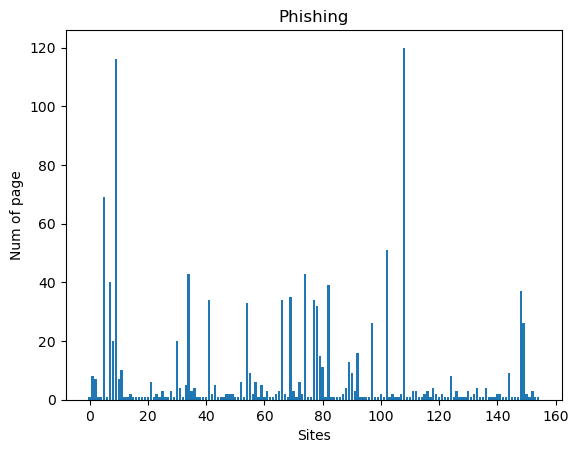

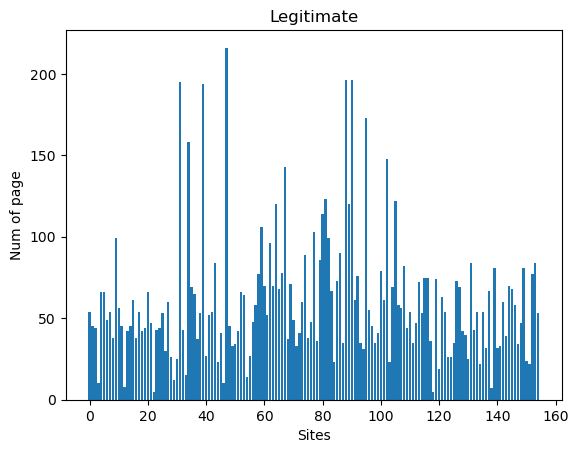

In [27]:
phishing_quantity = phishing_quantity[1:]
legitimate_quantity = legitimate_quantity[1:]
print(phishing_quantity)
print(legitimate_quantity)
drawG(phishing_quantity, "Phishing")
drawG(legitimate_quantity, "Legitimate")

(16, 32)
[[  0.          0.          0.          0.         58.841515   12.888386
    0.          0.          0.          0.          0.          0.
   14.919546    0.          0.         40.617466    0.          3.858054
    0.          0.          0.          0.          0.          0.
    0.9362525   0.         12.551799    0.          5.695878    0.
   24.09608     0.       ]
 [  0.          0.          0.          5.8006988   0.          8.693031
    0.          0.          3.3132176   1.0162511  19.446043    0.
    0.          0.         95.970726    0.          0.          0.
   32.915115   77.38379    29.162376    0.          0.          3.9241161
    0.         12.767947   20.41994     0.          0.          0.
    2.7825887   0.       ]
 [  0.          0.          0.         64.225494    0.          0.
    0.          7.6859846   0.         12.226402    0.          0.
    0.         31.833408    0.          0.          0.          0.
   15.18954     0.          0.          0

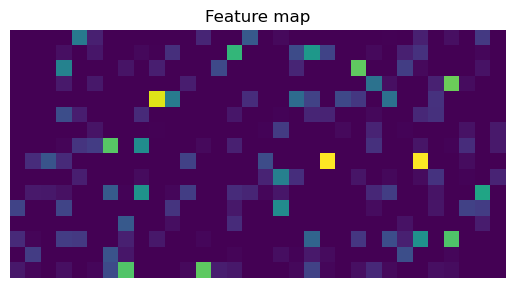

In [24]:
import matplotlib.pyplot as plt
import numpy as np

features = np.load('/home/haohao/Desktop/Hieu/VisualPhish/phishing_features/facebook/T59_0.jpg.npy')
showFeature(features)